In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from unc_tools import Hyper, UncRegression
import uncertainties as unc
from copy import deepcopy
import os


SAVE_DIR = os.path.expanduser("~/Obsidian/physha_practice/Исследование кинетики ферментативной реакции/")
def savefig(name, path= "", fig=None, bbox_inches = None, **kwargs):
    os.makedirs(SAVE_DIR, exist_ok=True)
    if bbox_inches is None:
        bbox_inches = "tight"
    if fig is None:
        fig = plt.gcf()
    new_path = os.path.join(SAVE_DIR, name)
    fig.savefig(new_path, bbox_inches = bbox_inches, **kwargs)
    fig.savefig(os.path.join(".", path, name), bbox_inches = bbox_inches, **kwargs)
    #print(f"Saved: {path}")
    #print(f"Saved: {path}")

In [2]:

time = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20]

V1 = [1.2, 5.8, 7, 8.2, 9.2, 10, 10.9, 11.6, 12.5, 13.2, 14, 15.2, 16.6, 17.8, 19, 20.2, 21.2, 22.2, 23.2, 24.1, 25.1, 26.8, 29.3]

V2 = [2.4, 4.3, 5.7, 6.9, 7.9, 9, 10, 11, 11.7, 12.4, 13.2, 14.6, 16.1, 17.4, 18.6, 19.6, 20.7, 21.8, 22.8, 23.8, 24.6, 26.5, 29]

V3 = [3.1, 4.3, 7.2, 9, 10.4, 11.8, 13.1, 14.2, 15.5, 16.6, 17.8, 19.8, 21.4, 23, 24.6, 26.2, 27.6, 29]

V4 = [3.2, 6.2, 8.2, 9.8, 11.6, 13.2, 14.4, 15.4, 16.8, 17.8, 18.8, 20.6, 22.4, 24.1, 25.6, 27.2, 28.4, 29.8]


df_time = pd.DataFrame({"t": time})
df_V1 = pd.DataFrame({"V": V1})
df_V2 = pd.DataFrame({"V": V2})
df_V3 = pd.DataFrame({"V": V3})
df_V4 = pd.DataFrame({"V": V4})

DF = pd.DataFrame({"temp": [28,35, 41,45],
                  "V0": [39.5,40.4, 41.2,41.7]})
DF.temp += 273.15

dfs = [df_V1, df_V2, df_V3, df_V4]


,temp,V0,k
0,301.15,39.5,0.0597+/-0.0010
1,308.15,40.4,0.0571+/-0.0005
2,314.15,41.2,0.0922+/-0.0009
3,318.15,41.7,0.0933+/-0.0011


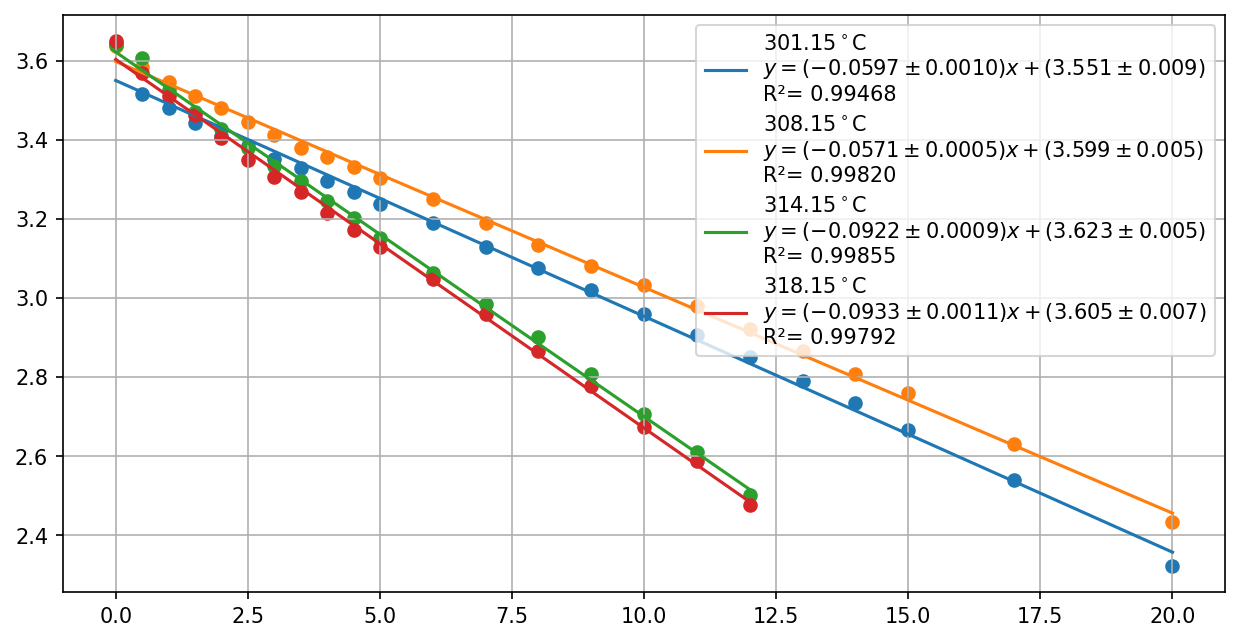

In [3]:
fig, axe = plt.subplots(figsize=(10,5), dpi = 150)

a = []
for i, df in enumerate(dfs):
    
    df_ = deepcopy(df)
    df_["time"] = time[:len(df_)]

    df_.V = DF.V0[i] - df_.V
    reg = UncRegression(df_.time, np.log(df_.V))
    reg.plot(ax=axe, label = f"{DF.temp.iloc[i]}$^\\circ$C")
    a.append(-reg.coefs[0])
    
DF["k"] = a

DF

(     temp    V0                k
 0  301.15  39.5  0.0597+/-0.0010
 1  308.15  40.4  0.0571+/-0.0005
 2  314.15  41.2  0.0922+/-0.0009
 3  318.15  41.7  0.0933+/-0.0011,
 array([-3665.965232479019+/-97.79236217704751,
        9.177842811460803+/-0.31406026093124956], dtype=object))

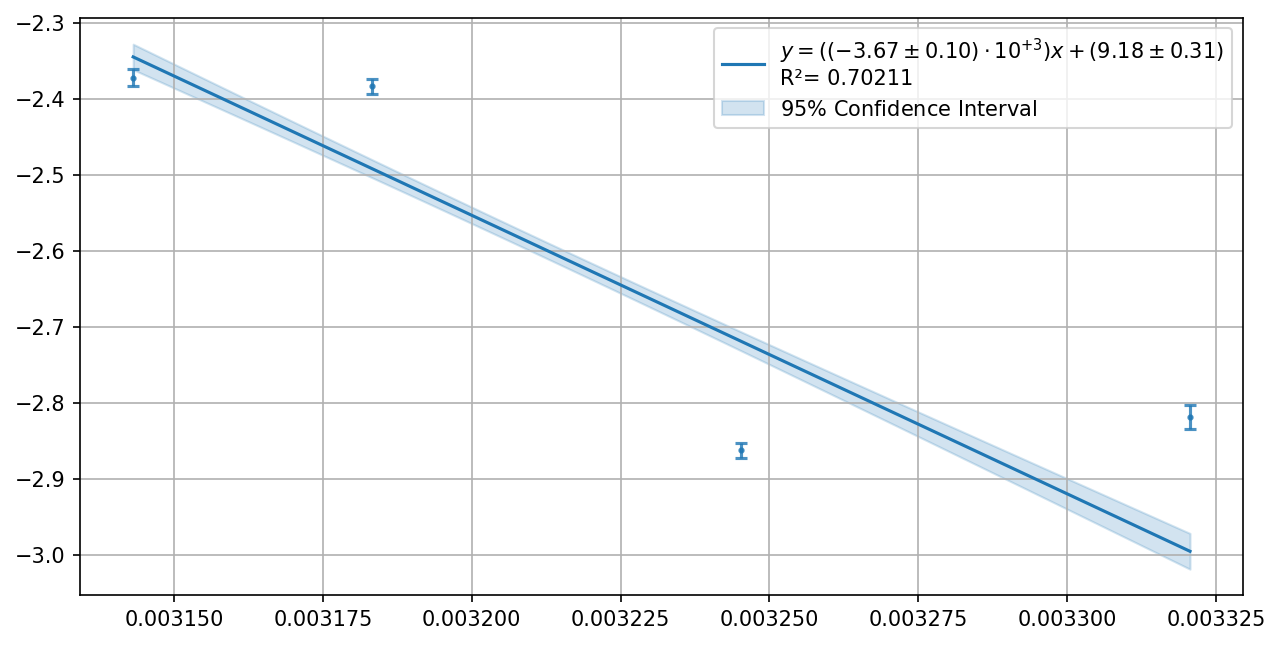

In [4]:
fig, axe = plt.subplots(figsize=(10,5), dpi = 150)

DF["k"] = unc.nominal_value(DF.k)


reg = UncRegression(1/DF.temp, unc.unumpy.log(DF.k))
reg.plot(ax=axe, show_band=True)

DF, reg.coefs